# Clustering 
## Concepts

One often finds clusters in nature and datasets
- subsets which are similar to each other
- and dissimilar to others

Examples

![south England](london_lights_2012087.jpg)

Night lights in southern England

![double open cluster](DoubleCluster_h_chi_per.jpg)

Double open cluster h and $\chi$ Perseii

![age_vs_matches](football_cluster.png)

Ages vs. football matches visited.

- Humans are quite good at identifying clusters
- Identifying clusters in data science is an important tool.
    - Identifying clusters of consumers with similar attributes can be used to bombard them 
      with targeted advertising
    - Groups with certain health risks could be identified and advised to see a doctor.
- A number of clustering algorithms exist each one with pros and cons

First let's generate a sample with known cluster properties in $(x,y)$ space.


In [1]:
import sklearn.datasets as skdat
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# define centres of three clusters
centres = [[-1., 0.], [1., -0.5], [0., 1.]]

# use make_blobs function to create dataset. 
# Points are normal distributed around the centres.
xy, nclust = skdat.make_blobs(1000, centers=centres, cluster_std=0.3)

What did we get?

In [4]:
for coor, iclust in zip (xy, nclust):
    print(coor, iclust)

[-1.10006541 -0.51455106] 0
[0.22131213 0.76807638] 2
[ 1.76135968 -0.81484287] 1
[-1.2384818 -0.6591887] 0
[-0.65210392 -0.13083744] 0
[-0.52766961  1.42455175] 2
[-0.51930756  0.1091145 ] 0
[ 1.21729818 -0.66382494] 1
[-0.40487077  0.72330422] 2
[-0.06930737  1.38382186] 2
[ 0.89156451 -0.33898492] 1
[ 0.57957493 -0.46975342] 1
[-0.72060544  0.09266154] 0
[ 1.12446225 -0.45169096] 1
[0.30414201 1.14211038] 2
[ 1.29997169 -0.71452404] 1
[-0.35997893  0.83376291] 2
[-1.50646938 -0.71713146] 0
[ 0.81964745 -0.38878282] 1
[0.33987772 1.23595616] 2
[0.10614323 0.91712586] 2
[ 1.27052315 -0.4070564 ] 1
[ 1.12099866 -0.245158  ] 1
[-0.215228    1.10801794] 2
[ 0.73542801 -0.21755611] 1
[-0.86848878  0.2706357 ] 0
[-0.19916304  1.18791834] 2
[0.28664678 1.20162818] 2
[0.31494814 1.28953387] 2
[ 1.33182492 -0.48507177] 1
[-0.94212489 -0.29372808] 0
[ 0.66018115 -1.23041853] 1
[ 0.78902513 -0.47018358] 1
[ 0.94804551 -0.95882678] 1
[ 0.21738426 -0.36149322] 1
[-0.55036347 -0.29704114] 0
[-0.15

[ 1.11577011 -0.68115942] 1
[ 0.73736171 -0.44443542] 1
[0.1269504  1.29610618] 2
[-0.92610985 -0.55010713] 0
[-1.22024447 -0.32195394] 0
[-0.26150675  0.732665  ] 2
[-0.3225175   0.79158855] 2
[-1.36726036 -0.07661765] 0
[-0.94888143  0.12980007] 0
[-0.46401484  0.74173451] 0
[-0.1764062   1.10963574] 2
[ 0.63891867 -0.37210871] 1
[-1.09993972  0.05821351] 0
[-0.6243984  -0.79626395] 0
[-1.13674355 -0.33483619] 0
[-0.79694226  0.072123  ] 0
[ 0.97280708 -0.54353189] 1
[-0.96370043  0.37903987] 0
[-0.03854553  0.74964133] 2
[-1.13688807  0.12745379] 0
[0.63150712 0.67650472] 2
[-1.10035452 -0.18194206] 0
[ 0.95120695 -1.03453082] 1
[0.47072805 1.18978852] 2
[ 1.05154002 -0.82832484] 1
[-0.59118905  0.05313856] 0
[ 1.19363717 -0.29863853] 1
[0.61349838 0.67319535] 2
[-1.12559807 -0.23844034] 0
[ 1.11210789 -0.25886334] 1
[ 0.99959319 -0.75350052] 1
[ 1.25216428 -0.82315096] 1
[ 1.23591561 -0.08901472] 1
[0.15150954 0.59891612] 2
[-0.92837123  0.36695619] 0
[-0.41807885  0.19015953] 0
[ 

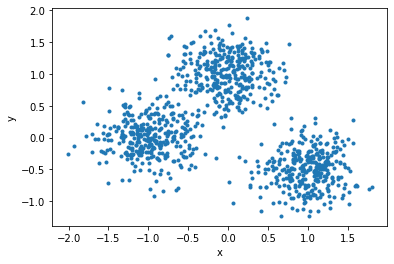

In [5]:
x = xy[:,0]   # extract x and y vectors
y = xy[:,1]

# What did we get?
plt.figure()
plt.plot(x, y, "o", markersize=3)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

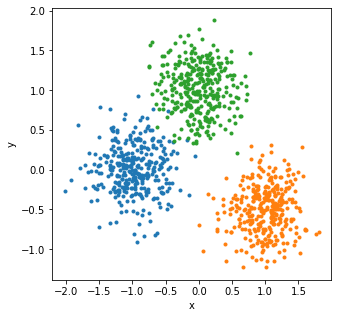

In [6]:
# cluster by cluster
plt.figure(figsize=(5.0, 5.0))

plt.plot(x[nclust==0], y[nclust==0], "o", markersize=3)
plt.plot(x[nclust==1], y[nclust==1], "o", markersize=3)
plt.plot(x[nclust==2], y[nclust==2], "o", markersize=3)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Clustering algorithms
### k-means

- k-means attempts to partition the samples into k clusters.
- k is given
- We'll get a set of cluster centres $\mathbf{S} = {S_1, S_2, S_3, \ldots S_k}$ each having coordinates $(S_{1,x}, S_{2,y})$
- One needs to measure the distance to the cluster centre. Usually the suqares of the Euklidian distance in vector space is used $(\mathbf{X} - \mathbf{S_i})^2$
- The minimisation problem:  $\min \sum_{i=1}^k \sum_{X \in S_i} (X-S_i)^2$ with $S_i$ begin the vector average over $X \in S_i$
- This is an iterative process

Implementation:
- visualise the data
- guess the number of clusters
- set-up the clusterer
- run the algorithm
- visualise and verify result
- possibly try another number of clusters


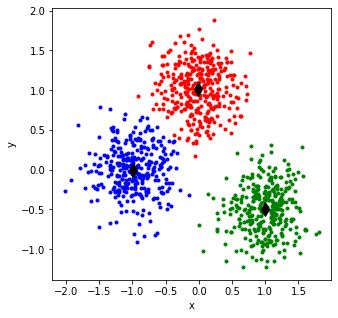

In [8]:
# from sklearn import cluster
import sklearn.cluster as cluster

# set up the clusterer, 3 expected clusters
kmeans = cluster.KMeans(n_clusters=3)

# Fit the data, results are stored in the kmeans object
kmeans.fit(xy)     # fit done on x,y pairs

labels = kmeans.labels_
#print(labels)    # labels is the number of the associated clusters of (x,y) points

# extract the estimated cluster centres
cen = kmeans.cluster_centers_
#print(cen)

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green"]
for l in range(0,3):     # loop over the different labels
    plt.plot(x[labels==l], y[labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(3):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
    
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Once we have fit (or trained) the clusterer cluster membership of new points can be tested

In [9]:
print(kmeans.predict([[0.5, 0.5]]))

[1]


### Affinity propagation

- Affinity propagation uses the concept of *exemplars*
- It can determine the number of clusters on its own
- Consider a function $s$ quantifying the *similarity* between two points
- If $s(X_i, X_j) > s(X_i, X_k)$ then $X_i$ is more similar to $X_j$ then to $X_k$.
- Often used: the negative Euklidean distance is used to measure similarity $s(X_i, X_j) = -(X_i -X_j)^2$

The algorithm works by "passing" messenges between points.
- A response matrix **R** is set up with values of $R_{ik} = s(X_i, X_k)$
- An availability matrix matrix **A** describes how appropriate it would be for $X_i$ to pick $X_k$ as exmplar relative to all the other points

Iteration over two steps
1. First **R** is updated

$R_{ik} = s(X_i, X_k) - \max_{k\ne k'}(A_{ik} +s(X_i, X'_k))$

2. Followed by an update of **A**

$A_{ik} = min_{i\ne k}\left(0, R_{ik} + \sum_{i' \ne k}max(0, R_{i'k}\right)$

After a number of iterations we can identify *examplars*, i.e. representatives of a cluster using the criterion.

$R_{ik} + A_{ik} > 0$

This can be after a fixed number of iterations or when the process stops.

Defineing a criterion matrix **C** = **A** + **R** we can group together rows that share the same exemplar - defined as the column with the highest criterion value.

The implementation

In [10]:
def make_colours():
    """ Creates a set of RGB representation of clusters. R, G,, B values are set in 
    steps of 0.25 and than all combinations of them are produced and returned as a list of
    tuples. """
    
    import itertools as iter
    
    r = (0.00, 0.35, 0.70)
    # g and b values are shifted to have more variation for the first 10-20 sets.
    g = (0.35, 0.70, 0.00)
    b = (0.70, 0.00, 0.35)
    
    # produce all combinations
    rgb = list(iter.product(r, g, b))
    
    return rgb

In [11]:
rgb = make_colours()
print(rgb)

[(0.0, 0.35, 0.7), (0.0, 0.35, 0.0), (0.0, 0.35, 0.35), (0.0, 0.7, 0.7), (0.0, 0.7, 0.0), (0.0, 0.7, 0.35), (0.0, 0.0, 0.7), (0.0, 0.0, 0.0), (0.0, 0.0, 0.35), (0.35, 0.35, 0.7), (0.35, 0.35, 0.0), (0.35, 0.35, 0.35), (0.35, 0.7, 0.7), (0.35, 0.7, 0.0), (0.35, 0.7, 0.35), (0.35, 0.0, 0.7), (0.35, 0.0, 0.0), (0.35, 0.0, 0.35), (0.7, 0.35, 0.7), (0.7, 0.35, 0.0), (0.7, 0.35, 0.35), (0.7, 0.7, 0.7), (0.7, 0.7, 0.0), (0.7, 0.7, 0.35), (0.7, 0.0, 0.7), (0.7, 0.0, 0.0), (0.7, 0.0, 0.35)]


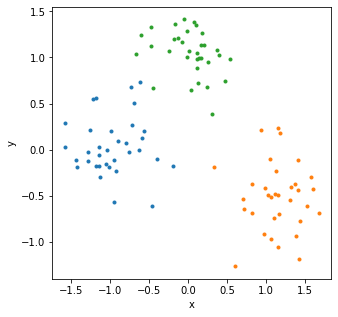

In [12]:
xy, nclust = skdat.make_blobs(100, centers=centres, cluster_std=0.3)

x = xy[:,0]   # extract x and y vectors
y = xy[:,1]

# cluster by cluster
plt.figure(figsize=(5.0, 5.0))

plt.plot(x[nclust==0], y[nclust==0], "o", markersize=3)
plt.plot(x[nclust==1], y[nclust==1], "o", markersize=3)
plt.plot(x[nclust==2], y[nclust==2], "o", markersize=3)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

C:\Users\Samuel\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


number of iterations 30
number of cluster centres 3
[[ 1.14621888 -0.4937418 ]
 [ 0.01649505  1.07381978]
 [-1.03702038 -0.00742117]]
3
(0.0, 0.35, 0.7)
(0.0, 0.35, 0.0)
(0.0, 0.35, 0.35)
[[ 1.14621888 -0.4937418 ]
 [ 0.01649505  1.07381978]
 [-1.03702038 -0.00742117]]


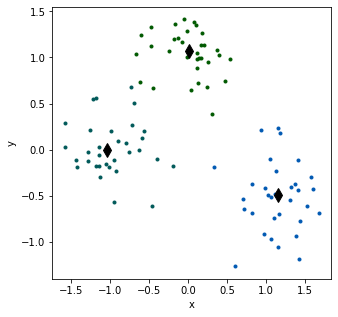

In [13]:
# set up the clusterer
ap = cluster.AffinityPropagation(max_iter=2000, preference=-5)
# preference=-5  Preferences for each point - points with larger values of preferences are more 
# likely to be chosen as exemplars. Influences the number of clusters

# runnig it
ap.fit(xy)

labels = ap.labels_
cen = ap.cluster_centers_
# extract labels and centres
print("number of iterations", ap.n_iter_)
print("number of cluster centres", len(cen))

print(cen)
# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))
print(len(cen))
col = ["blue", "red", "green"]
for l in range(0, len(cen)):     # loop over the different labels
    plt.plot(x[labels==l], y[labels==l], "o", markersize=3, color=rgb[l])
    print(rgb[l])
print(cen)    
# show cluster centres
for ic in range(len(cen)):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
    
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Agglomerative clustering

Type of *hierachical* clustering

- at first every point belongs to its own cluster - n clusters
- building up clusters by points being close together using some similarity measure $s$, often used $s(X_i, X_j) = -(X_i -X_j)^2$
- clustering clusters together
- clustering clusters of clusters together
- continue until complete hierachy has been build up.
- the number of clusters needs to be defined

![Hierachial clustering](hierachical_clustering.jpg)

Implementation

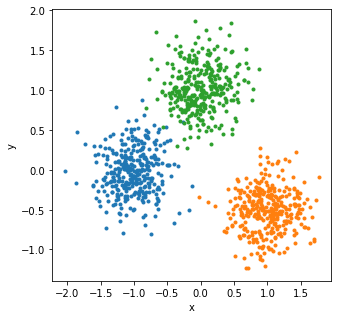

In [14]:
xy, nclust = skdat.make_blobs(1000, centers=centres, cluster_std=0.3)

x = xy[:,0]   # extract x and y vectors
y = xy[:,1]

# cluster by cluster
plt.figure(figsize=(5.0, 5.0))

plt.plot(x[nclust==0], y[nclust==0], "o", markersize=3)
plt.plot(x[nclust==1], y[nclust==1], "o", markersize=3)
plt.plot(x[nclust==2], y[nclust==2], "o", markersize=3)

plt.xlabel("x")
plt.ylabel("y")
plt.show()

[-8.192478303976852e-05, 0.9756414382931725, -1.0297650321775769]


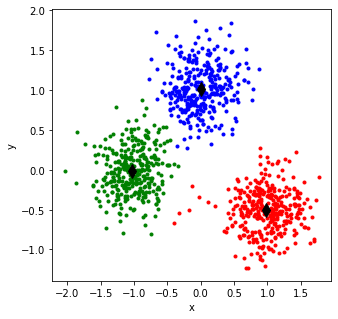

In [15]:
# set up the clusterer
ac = cluster.AgglomerativeClustering(n_clusters=3)

# carry out the fitting
ac.fit(xy)

labels = ac.labels_

# The clusterer does not return cluster centres, but they are easily computed
xcen = []
ycen = []
for ic in range(3):
    xc = np.average(x[labels==ic])
    yc = np.average(y[labels==ic])
    xcen.append(xc)
    ycen.append(yc)
print(xcen)

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green"]
for l in range(0,3):     # loop over the different labels
    plt.plot(x[labels==l], y[labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(3):
    plt.plot(xcen[ic], ycen[ic], "dk", markersize=10)
    
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Extracting data from the web



In [16]:
import pandas as pd

# URL for FTSE100 constituents
url = "https://www.londonstockexchange.com/indices/ftse-100/constituents/table"

page_ftse100 = pd.read_html(url)

What did we get?

In [17]:
print(page_ftse100)

[   CodeA-ZZ-A                                         NameA-ZZ-A  \
0         CPG                     COMPASS GROUP PLC ORD 11 1/20P   
1         PRU                              PRUDENTIAL PLC ORD 5P   
2        BRBY                       BURBERRY GROUP PLC ORD 0.05P   
3         RIO                              RIO TINTO PLC ORD 10P   
4        GLEN                           GLENCORE PLC ORD USD0.01   
5         WTB                      WHITBREAD PLC ORD 76 122/153P   
6        STAN                 STANDARD CHARTERED PLC ORD USD0.50   
7         IAG  INTL CONSOLIDATED AIRLINES GROUP SA ORD EUR0.1...   
8         PSH               PERSHING SQUARE HOLDINGS LTD ORD NPV   
9         IHG  INTERCONTINENTAL HOTELS GROUP PLC ORD 20 340/399P   
10        ITV                                    ITV PLC ORD 10P   
11       ANTO                             ANTOFAGASTA PLC ORD 5P   
12        NXT                                   NEXT PLC ORD 10P   
13        BP.                                  

This is a list. Simple extraction of a dataframe

In [18]:
df_ftse100 = page_ftse100[0]
print(df_ftse100.columns)
print(df_ftse100.describe())

Index(['CodeA-ZZ-A', 'NameA-ZZ-A', 'CurrencyA-ZZ-A',
       'Market cap (m)Highest – lowestLowest – highest',
       'PriceHighest – lowestLowest – highest',
       'ChangeHighest – lowestLowest – highest',
       'Change %Highest – lowestLowest – highest'],
      dtype='object')
       Market cap (m)Highest – lowestLowest – highest  \
count                                       20.000000   
mean                                     29413.517000   
std                                      39488.611004   
min                                       2699.440000   
25%                                       6052.367500   
50%                                      13905.870000   
75%                                      32098.617500   
max                                     167464.960000   

       PriceHighest – lowestLowest – highest  \
count                              20.000000   
mean                             2180.156500   
std                              2351.855747   
min          

In [19]:
# second page
url = "https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=2"

page_ftse = pd.read_html(url)
df_ftse100b = page_ftse[0]

df_ftse100 = pd.concat([df_ftse100, df_ftse100b])
print(df_ftse100.describe())

       Market cap (m)Highest – lowestLowest – highest  \
count                                        40.00000   
mean                                      22029.32650   
std                                       32060.97667   
min                                        2699.44000   
25%                                        5708.83250   
50%                                       10869.31000   
75%                                       21964.17750   
max                                      167464.96000   

       PriceHighest – lowestLowest – highest  \
count                              40.000000   
mean                             1601.295750   
std                              1865.716578   
min                                68.820000   
25%                               482.025000   
50%                               896.850000   
75%                              1845.375000   
max                              8370.000000   

       ChangeHighest – lowestLowest – highest  
count

What happens when more than one table appears?

In [20]:
url = "https://en.wikipedia.org/wiki/Germany"
page_germ = pd.read_html(url)

In [21]:
print(len(page_germ))
df = page_germ[2]
print(df)

25
                                                    0            1  \
0   State Capital Area (km2)[133] Population (2018...          NaN   
1                                               State      Capital   
2                                   Baden-Württemberg    Stuttgart   
3                                             Bavaria       Munich   
4                                              Berlin       Berlin   
5                                         Brandenburg      Potsdam   
6                                              Bremen       Bremen   
7                                             Hamburg      Hamburg   
8                                               Hesse    Wiesbaden   
9                              Mecklenburg-Vorpommern     Schwerin   
10                                       Lower Saxony      Hanover   
11                             North Rhine-Westphalia   Düsseldorf   
12                               Rhineland-Palatinate        Mainz   
13               

Downloading and reading files from the web.

In [22]:
url = "https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/heathrowdata.txt"

df_heathrow = pd.read_csv(url)

HTTPError: HTTP Error 403: Forbidden

In [23]:
import requests as req

r_heathrow = req.get(url)
data = r_heathrow.text
print(data[0:1000])

Heathrow (London Airport)
Location 507800E 176700N, Lat 51.479 Lon -0.449, 25m amsl
Estimated data is marked with a * after the value.
Missing data (more than 2 days missing in month) is marked by  ---.
Sunshine data taken from an automatic Kipp & Zonen sensor marked with a #, otherwise sunshine data taken from a Campbell Stokes recorder.
   yyyy  mm   tmax    tmin      af    rain     sun
              degC    degC    days      mm   hours
   1948   1    8.9     3.3    ---     85.0    ---
   1948   2    7.9     2.2    ---     26.0    ---
   1948   3   14.2     3.8    ---     14.0    ---
   1948   4   15.4     5.1    ---     35.0    ---
   1948   5   18.1     6.9    ---     57.0    ---
   1948   6   19.1    10.3    ---     67.0    ---
   1948   7   21.7    12.0    ---     21.0    ---
   1948   8   20.8    11.7    ---     67.0    ---
   1948   9   19.6    10.2    ---     35.0    ---
   1948  10   14.9     6.0    ---     50.0    ---
   1948  11   10.8     4.6    ---     44


In [24]:
import requests
import pandas as pd
import io

r_data = requests.get(url).content
df = pd.read_csv(io.StringIO(r_data.decode('utf-8')))

In [25]:
print(df)

                                                                                                      Heathrow (London Airport)
Location 507800E 176700N                            Lat 51.479 Lon -0.449                                              25m amsl
Estimated data is marked with a * after the value. NaN                                                                      NaN
Missing data (more than 2 days missing in month... NaN                                                                      NaN
Sunshine data taken from an automatic Kipp & Zo...  otherwise sunshine data taken from a Campbell ...                       NaN
   yyyy  mm   tmax    tmin      af    rain     sun NaN                                                                      NaN
...                                                                                                                         ...
   2021  12   10.1     5.3       3    71.2    2... NaN                                                  